In [1]:
import pandas as pd
import math, os, sys, glob
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
mpl.rcParams['figure.dpi'] = 500
pd.set_option('display.max_columns', 1000)
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append(os.path.abspath(os.path.join('../src/')))

In [3]:
from preprocess import Preprocess
from user import User
from action_logging import Logger
from plot_user import PlotUser
from plot import Plot
from plot_progression import PlotProgression
from generate_html import HTML

In [4]:
logger = Logger(log_flag = True, log_file = "run", log_path = "../logs/")

### Load and Clean data

In [5]:
preprocess = Preprocess(input_file = '../data/input-muzu.txt', logger = logger)

preprocess.read_file()
preprocess.clean_data()
preprocess.drop_message()
preprocess.prepare_df()
preprocess.check_n_users()
# preprocess.print_sample(10)

>> In preprocess.py (read_file): Reading of input file: ../data/input-muzu.txt starts <<
>> In preprocess.py (read_file): Reading of input file: ../data/input-muzu.txt ends <<
>> In preprocess.py (clean_data): Cleaning of data starts <<
>> In preprocess.py (clean_data): Cleaning of data ends <<
>> In preprocess.py (drop_message): Dropping message containing: Messages to this chat and calls are now secured with end-to-end encryption starts <<
>> In preprocess.py (drop_message): Dropping message containing: Messages to this chat and calls are now secured with end-to-end encryption ends <<
>> In preprocess.py (prepare_df): Preparation of data frame starts <<
>> In preprocess.py (prepare_df): Preparation of data frame ends <<
>> In preprocess.py (check_n_users): You Chat data have 2 users. <<


In [6]:
preprocess.pd_data

,Timestamp,User,Message,Date,Weekday
0,2014-11-16 15:55:00,Muzeef Shaik,Aboooo kummeduu ga,16-Nov-2014,Sun
1,2014-11-16 16:33:00,Kartheek Palepu,Haaaa,16-Nov-2014,Sun
2,2014-11-18 19:56:00,Muzeef Shaik,Em chstnv darlzzz ????,18-Nov-2014,Tue
3,2014-11-18 23:09:00,Kartheek Palepu,Ipde room ki vacha,18-Nov-2014,Tue
4,2014-11-18 23:11:00,Kartheek Palepu,About 2 sleep ra,18-Nov-2014,Tue
...,...,...,...,...,...
20978,2019-12-31 20:33:00,Muzeef Shaik,Nenae oka 4 beers teechukunaaa,31-Dec-2019,Tue
20979,2019-12-31 20:33:00,Muzeef Shaik,Taggesi Annam tinni padukovadamae,31-Dec-2019,Tue
20980,2020-01-01 00:05:00,Kartheek Palepu,Munafa patel,01-Jan-2020,Wed
20981,2020-01-01 00:05:00,Kartheek Palepu,Happy New year ra,01-Jan-2020,Wed


### Analysis
#### User based analysis

>> Starting for User: Kartheek Palepu <<
>> In user.py (__init__): Initializing members for user: Kartheek Palepu starts <<
>> In user.py (__init__): Initializing members for user: Kartheek Palepu ends <<
>> In user.py (get_clean_messages): Cleaning of messages starts <<
>> In user.py (remove_emoticons): Removing punctuation starts <<
>> In user.py (remove_emoticons): Removing punctuation ends <<
>> In user.py (remove_emoticons): Removing emoticons starts <<
>> In user.py (remove_emoticons): Removing emoticons ends <<
>> In user.py (remove_links): Removing links starts <<
>> In user.py (remove_links): Removing links ends <<
>> In user.py (get_clean_messages): Cleaning of messages ends <<
>> In user.py (get_link_count): Counting of links starts <<
>> In user.py (get_link_count): Counting of links ends <<
>> In user.py (get_media_count): Counting media starts <<
>> In user.py (get_media_count): Counting media ends <<
>> In user.py (get_emoji_count): Counting of emoji starts <<
>> In user

>> In response.py (group_the_data): Grouping the data ends <<
>> In response.py (create_response_time): Creating Response time starts <<
>> In response.py (create_response_time): Creating Response time ends <<
>> In user.py (get_response_time): Fetching response time ends <<
>> In user.py (get_top_k_words): Fetching top 10 Words starts <<
>> In user.py (get_top_k_words): Fetching top 10 Words ends <<
>> In user.py (get_top_k_words): Fetching top 10 Words starts <<
>> In user.py (get_top_k_words): Fetching top 10 Words ends <<
>> In user.py (get_top_k_words): Fetching top 10 Words starts <<
>> In user.py (get_top_k_words): Fetching top 10 Words ends <<
>> In user.py (get_top_k_emojis): Fetching top 5 Emojis starts <<
>> In user.py (get_top_k_emojis): Fetching top 5 Emojis ends <<
>> In user.py (get_words_for_wordcloud): Fetching Words for WordCloud starts <<
>> In user.py (get_words_for_wordcloud): Fetching  Words for WordCloud ends <<
>> In user.py (get_words_for_wordcloud): Fetching W

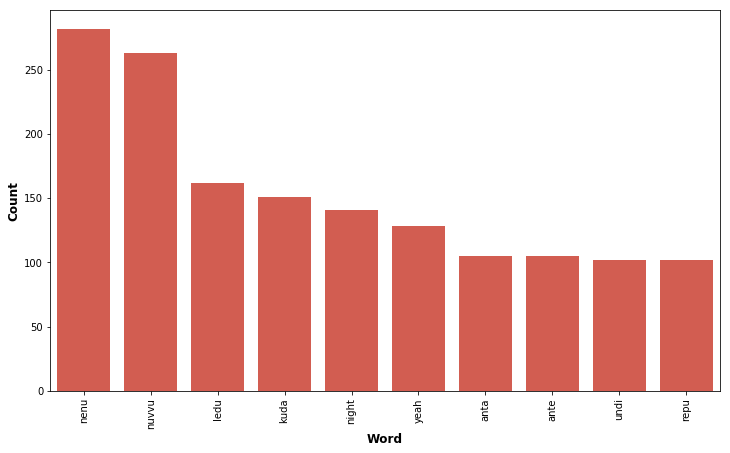

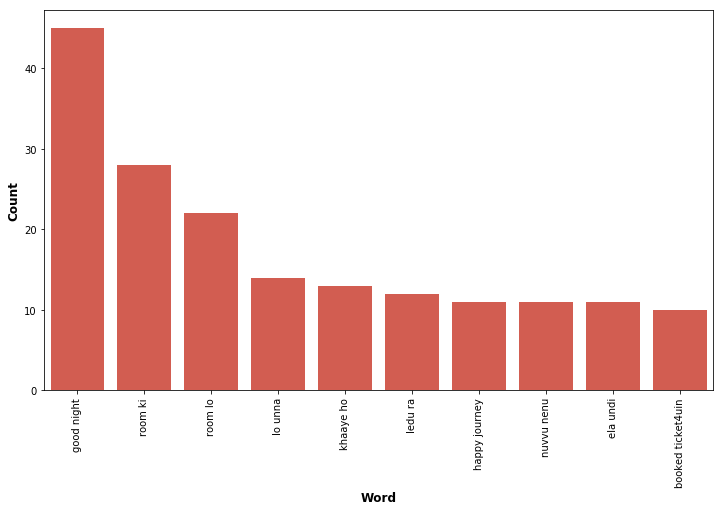

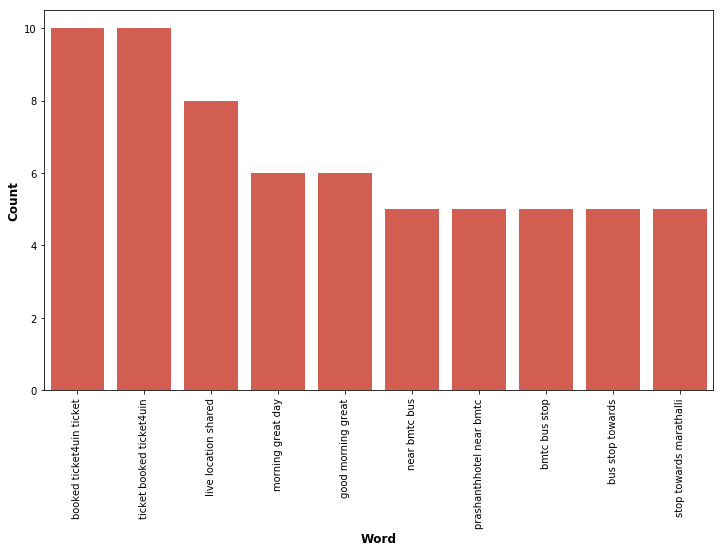

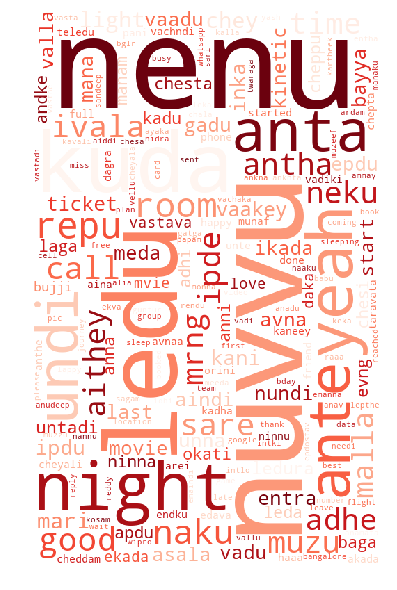

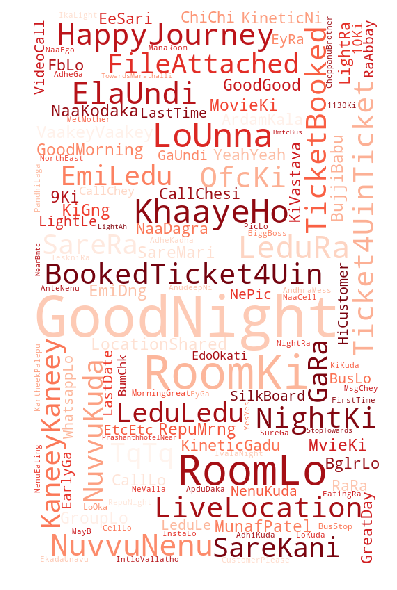

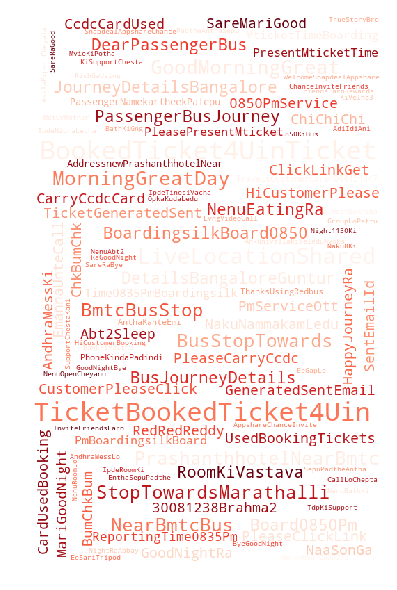

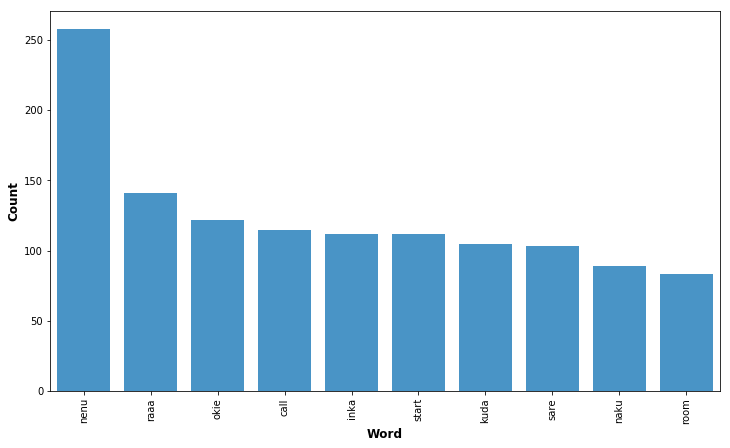

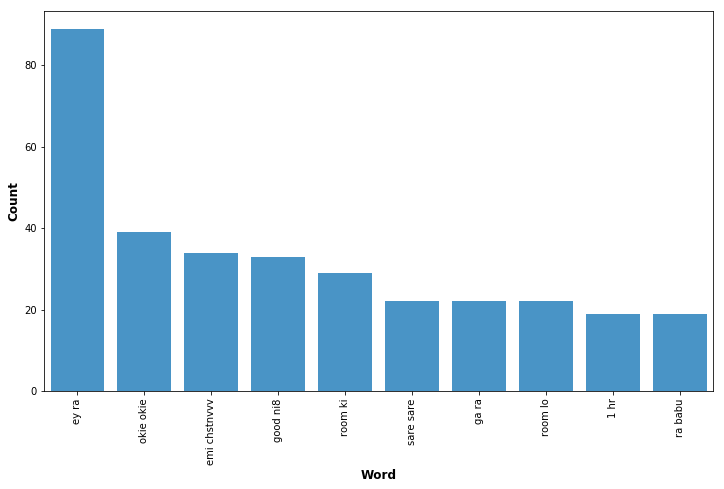

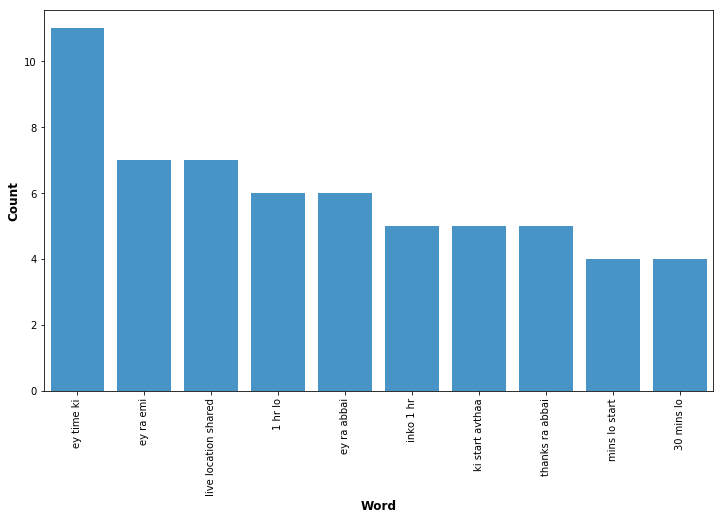

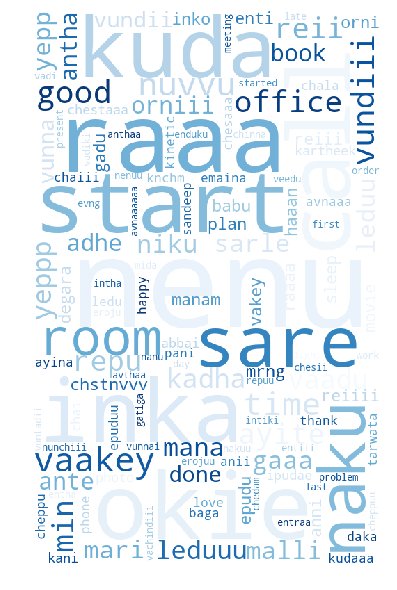

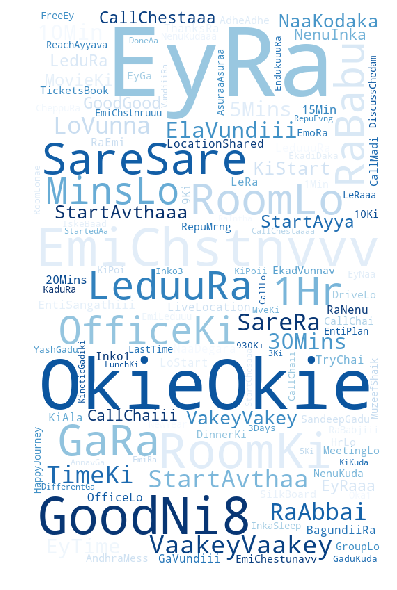

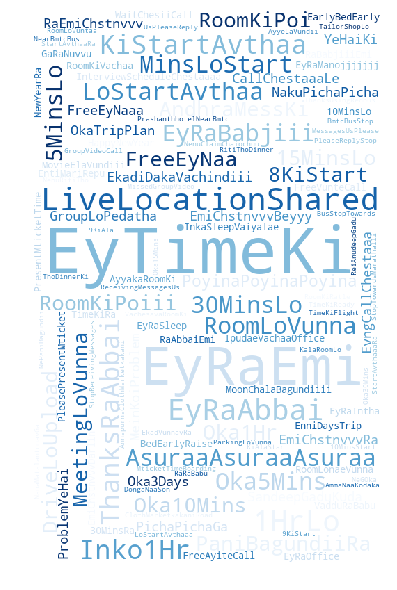

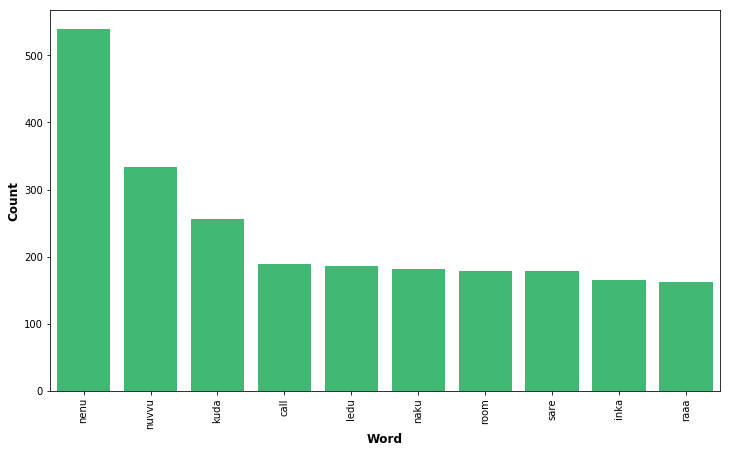

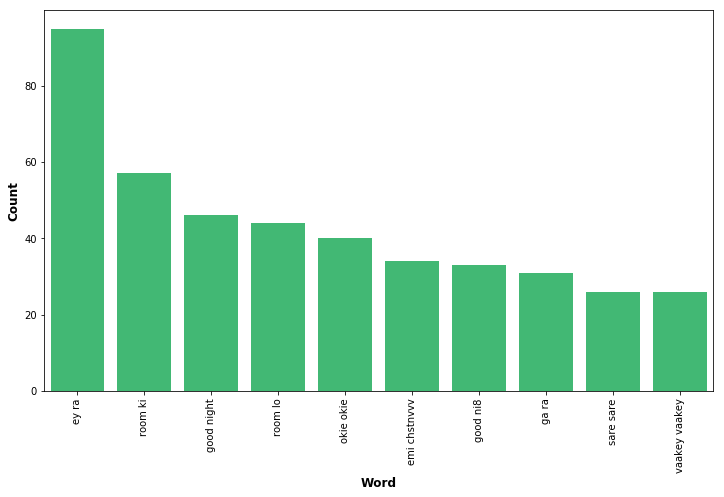

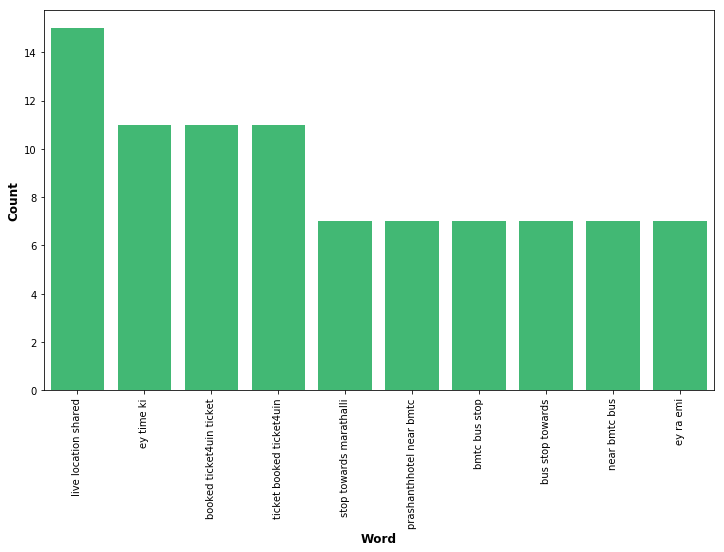

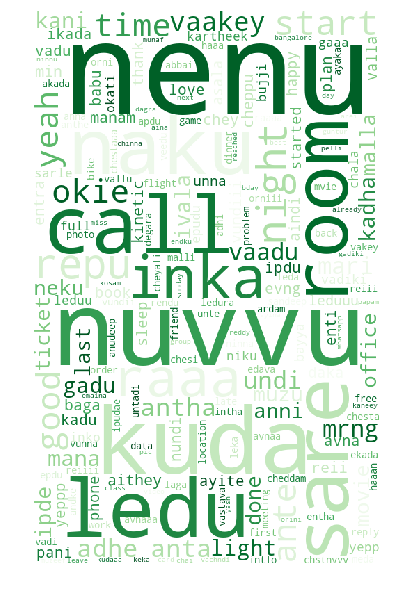

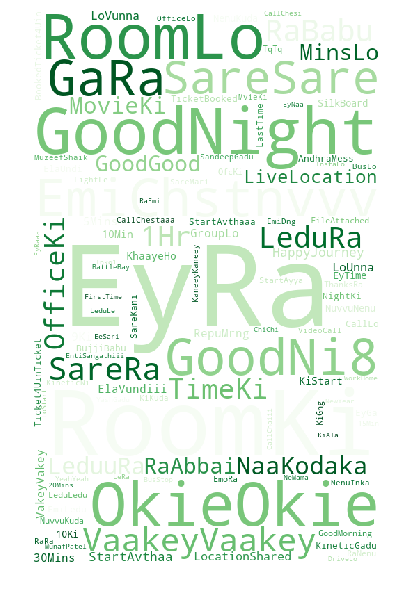

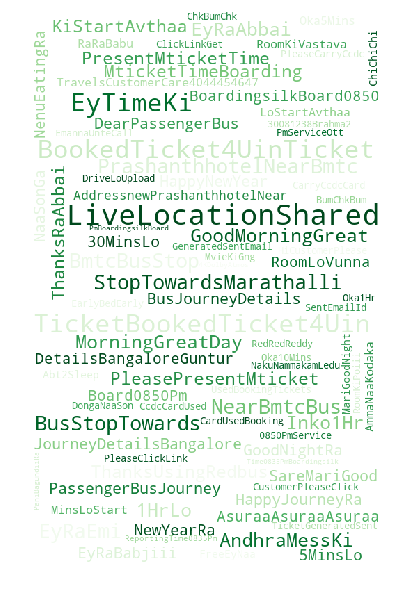

In [7]:
user_data_list = []
for user_idx, user in enumerate(preprocess.users + ['Overall']):
    logger.write_logger(f"Starting for User: {user}")
    if user == 'Overall':
        user_subset_data = preprocess.pd_data.copy()
    else:
        user_subset_data = preprocess.pd_data[preprocess.pd_data['User'] == user]

    # Fetch user statistics --------------------------------------------------------------------------------------------
    user_data = User(
        user_name = user,
        color_map = preprocess.color_map,
        messages = user_subset_data['Message'],
        timestamp = user_subset_data['Timestamp'],
        users = user_subset_data['User'],
        logger = logger)
    user_data.get_clean_messages(). \
        get_link_count(). \
        get_media_count(). \
        get_emoji_count(). \
        get_total_stats(). \
        get_emoji_statistics(). \
        get_avg_stats(). \
        get_top_stats(data = preprocess.pd_data). \
        get_response_time(data = preprocess.pd_data)

    # Plot user statistics ---------------------------------------------------------------------------------------------
    plot_user_obj = PlotUser(user_object = user_data, user_idx = user_idx + 1)
    plot_user_obj.plot_top_k_ngrams(n_grams = 1, k = 10)
    plot_user_obj.plot_top_k_ngrams(n_grams = 2, k = 10)
    plot_user_obj.plot_top_k_ngrams(n_grams = 3, k = 10)
    user_data.pd_emoji_rank = plot_user_obj.plot_top_k_emojis(k = 5, normalize = True)
    plot_user_obj.plot_word_cloud()
    plot_user_obj.plot_word_cloud(n_grams = 2)
    plot_user_obj.plot_word_cloud(n_grams = 3)

    user_data_list.append(user_data)

    logger.write_logger(f"Ending for User: {user}")

### Plots - Overall

>> In user.py (get_domain_count): Fetching Domains from links starts <<


Exception reading Public Suffix List url https://publicsuffix.org/list/public_suffix_list.dat
Traceback (most recent call last):
  File "C:\Users\LEP5KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 595, in urlopen
    self._prepare_proxy(conn)
  File "C:\Users\LEP5KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 816, in _prepare_proxy
    conn.connect()
  File "C:\Users\LEP5KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connection.py", line 294, in connect
    self._tunnel()
  File "C:\Users\LEP5KOR\AppData\Local\Continuum\anaconda3\lib\http\client.py", line 919, in _tunnel
    message.strip()))
OSError: Tunnel connection failed: 407 Proxy Authentication Required

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LEP5KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\adapters.py", line 449, in send
    tim

>> In user.py (get_domain_count): Fetching Domains from links ends <<
>> In user.py (get_userwise_emoji_count): Fetching Userwise Emoji Count starts <<
>> In user.py (get_userwise_emoji_count): Fetching Userwise Emoji Count ends <<


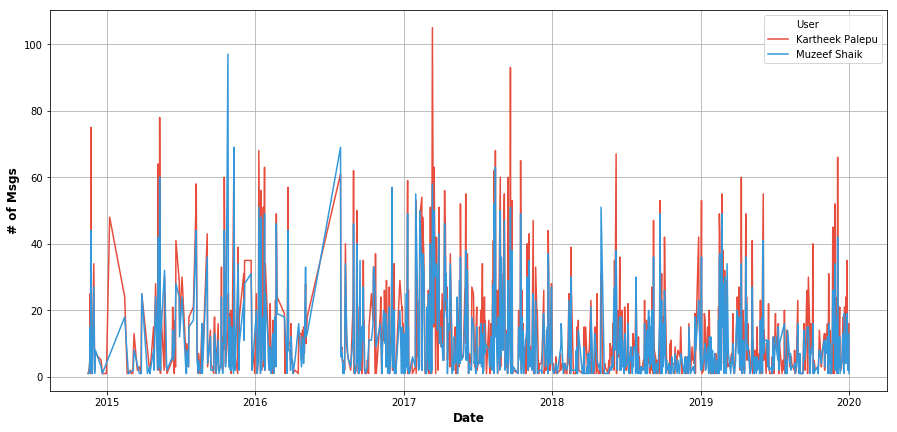

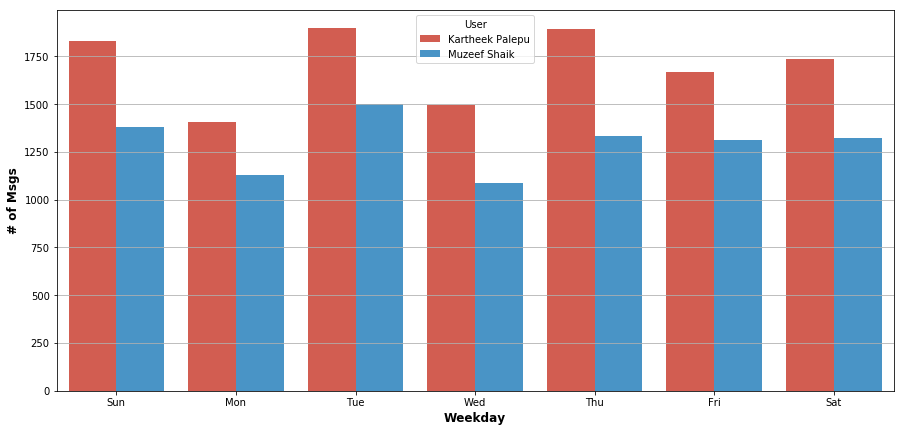

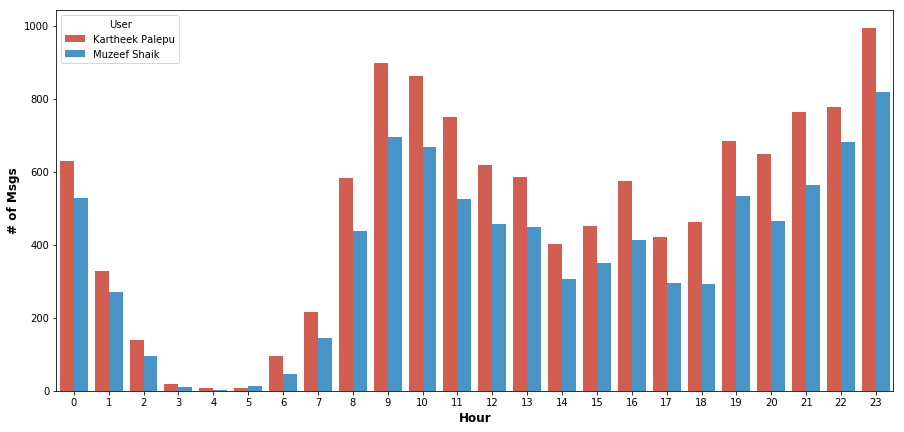

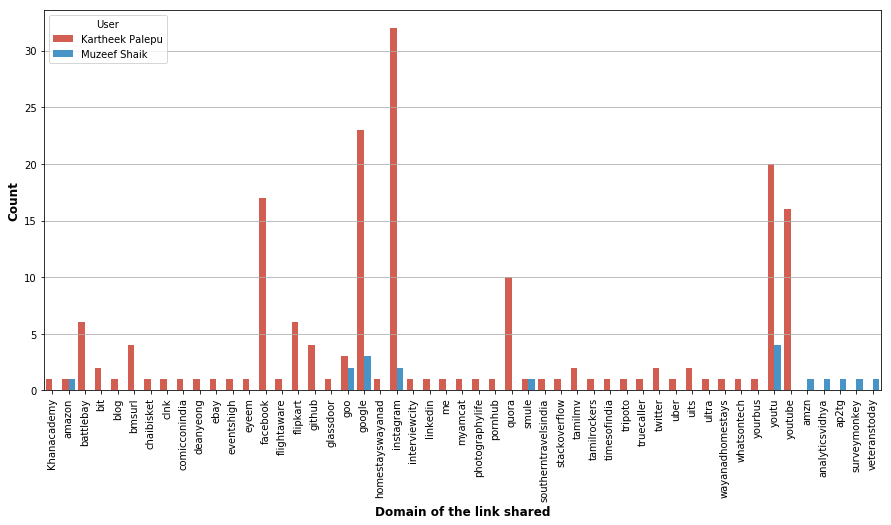

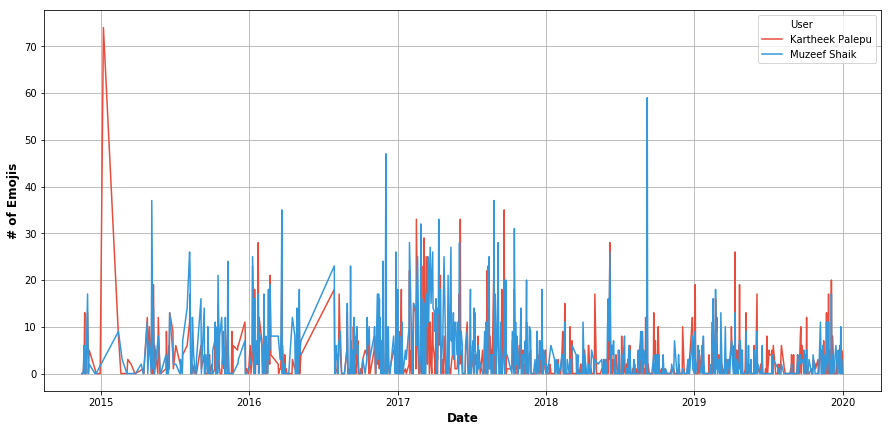

In [8]:
plot_obj = Plot(data = preprocess.pd_data, color_map = preprocess.color_map)
plot_obj.plot_date_n_msgs()
plot_obj.plot_weekday_n_msgs()
plot_obj.plot_hour_n_msgs()
plot_obj.plot_domain_counts(user_object = user_data_list[-1])
plot_obj.plot_date_n_emojis(user_object = user_data_list[-1])

### Plot - Progression

>> In response.py (group_the_data): Grouping the data starts <<
>> In response.py (group_the_data): Grouping the data ends <<
>> In response.py (create_response_time): Creating Response time starts <<
>> In response.py (create_response_time): Creating Response time ends <<


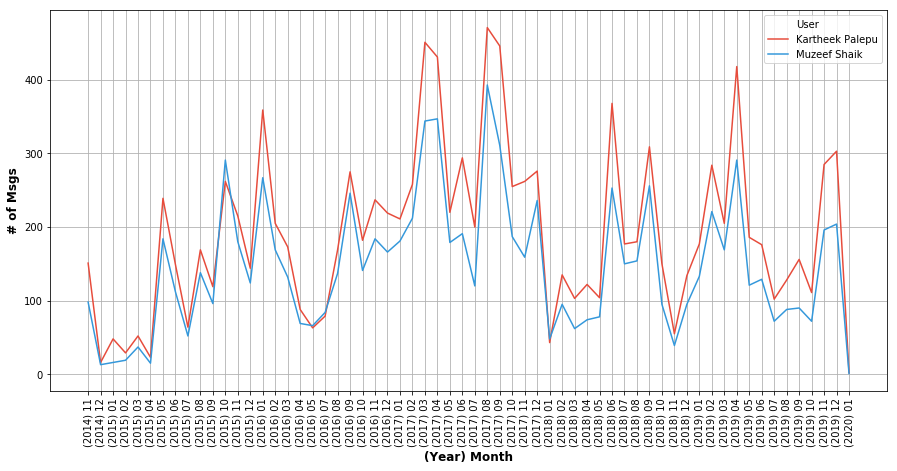

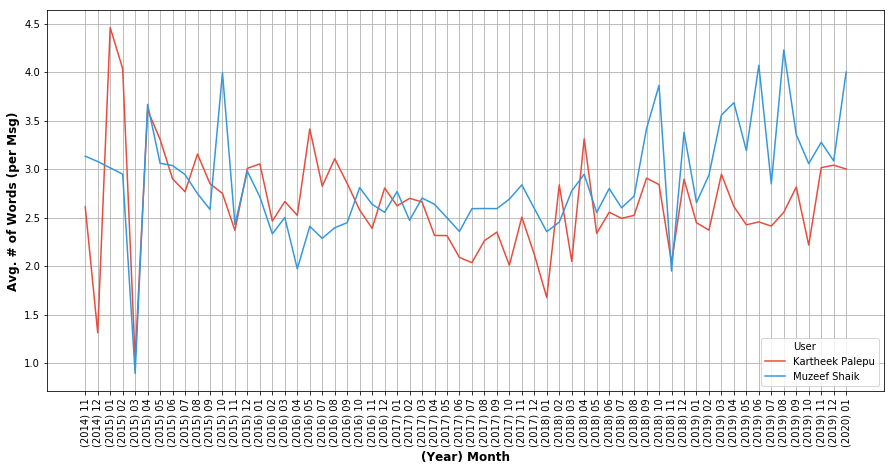

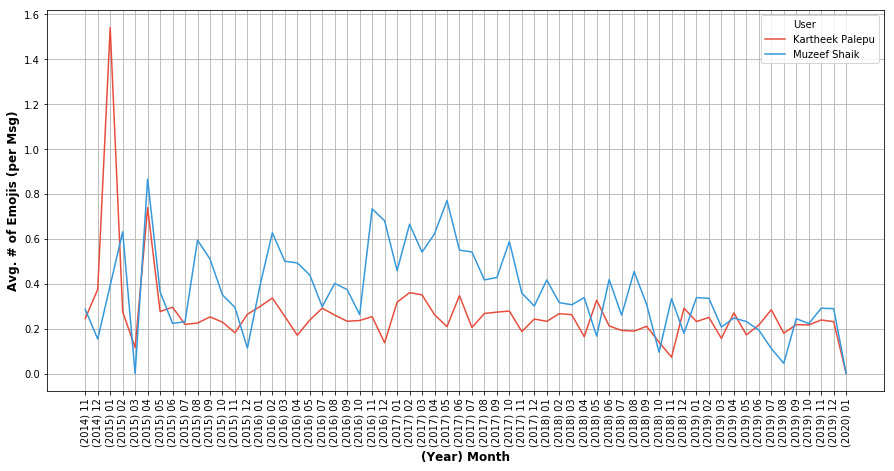

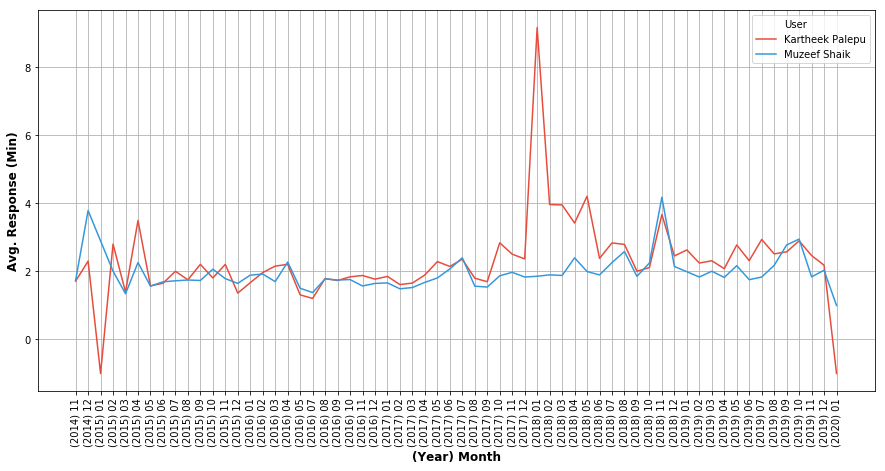

In [9]:
plot_progression_obj = PlotProgression(data = preprocess.pd_data, color_map = preprocess.color_map)
plot_progression_obj.plot_monthly_msg_progression()
plot_progression_obj.plot_monthly_word_progression(user_object = user_data_list[-1])
plot_progression_obj.plot_monthly_emoji_progression(user_object = user_data_list[-1])
plot_progression_obj.plot_monthly_response_time_progression(user_object = user_data_list[-1])

### Generate HTML

In [10]:
html_obj = HTML(
    user1=user_data_list[0],
    user2=user_data_list[1],
    overall=user_data_list[2],
    html_path="../html_template/index.html",
    logger=logger)

In [13]:
html_obj = html_obj.populate_members()

>> In generate_html.py (HTMLImages/populate_word_cloud): Populating Word Cloud <<
>> In generate_html.py (HTMLImages/populate_rest_images): Populating Rest of the images <<
>> In generate_html.py (HTMLStats/populate_names): Populating names <<
>> In generate_html.py (HTMLStats/populate_totals): Populating totals <<
>> In generate_html.py (HTMLStats/populate_averages): Populating Averages <<
>> In generate_html.py (HTMLStats/populate_tops): Populating Tops <<
>> In generate_html.py (HTMLStats/populate_response): Populating Response Times <<
>> In generate_html.py (HTMLStats/populate_emoji_ranks): Populating Emoji ranks <<


In [14]:
html_obj = html_obj.populate_html_txt()

In [15]:
html_obj = html_obj.populate_html_img()

In [18]:
html_obj.save_html()